# 3) VAD

In [1]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def draw_waveform(wav, sr, figsize=(14, 5)):
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)
    ipd.Audio(wav, rate=sr)
    plt.show()

In [3]:
wav, sr = librosa.load("test.wav")

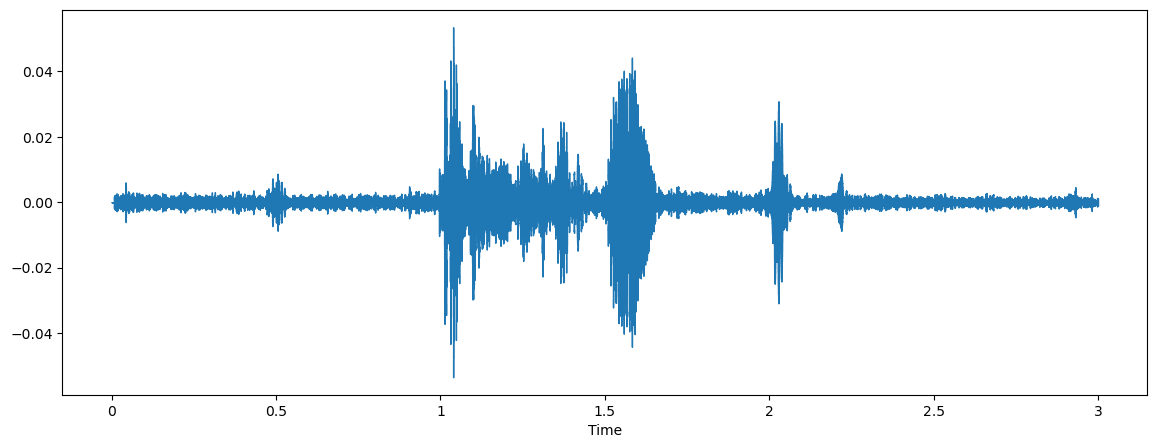

In [4]:
draw_waveform(wav, sr)

In [5]:
ipd.Audio(wav, rate=sr)

In [10]:
def energy_based_vad(audio, sr, frame_length=0.03, threshold=0.01):
    frame_size = int(frame_length * sr)
    n_frames = len(audio) // frame_size
    frames = np.array_split(audio[:n_frames * frame_size], n_frames)
    energy = [np.sum(np.abs(frame)) / len(frame) for frame in frames]
    energy = np.array(energy)
    energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
    vad_labels = (energy > threshold).astype(int)
    
    return vad_labels, energy

In [11]:
def plot_vad(wav, sr, vad_labels):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0, len(wav)/sr, len(wav)), wav)
    plt.title("Аудиосигнал")
    plt.subplot(2, 1, 2)
    plt.plot(np.linspace(0, len(wav)/sr, len(vad_labels)), vad_labels)
    plt.title("Результат VAD (1 - речь, 0 - пауза)")
    plt.tight_layout()
    plt.show()

In [20]:
vad_labels, energy = energy_based_vad(wav, sr, threshold=0.04)

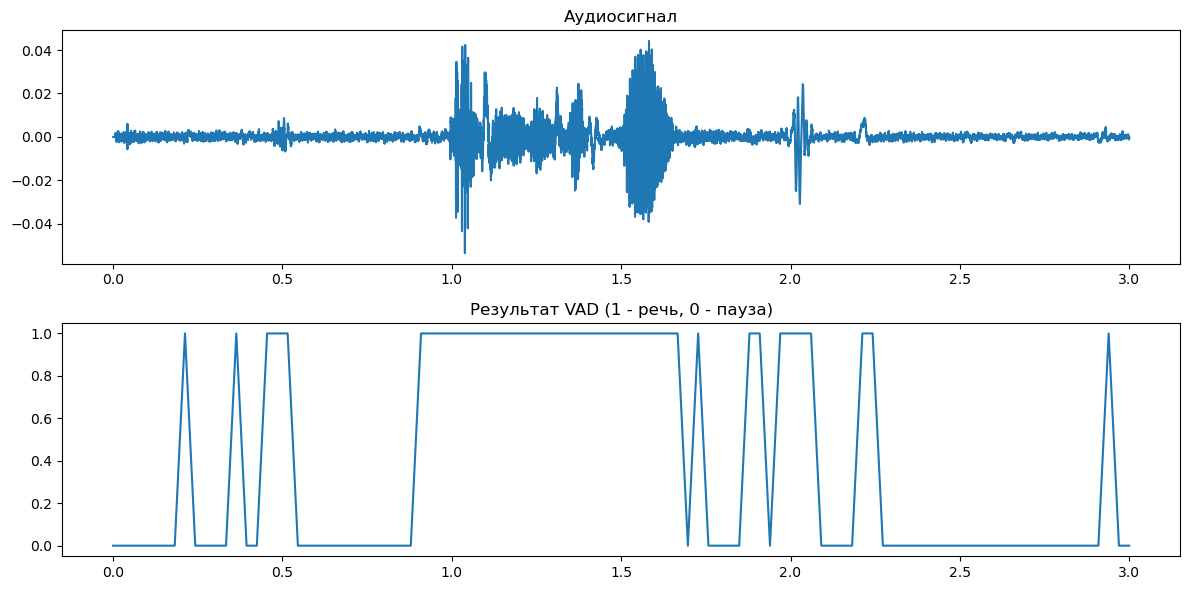

In [21]:
plot_vad(wav, sr, vad_labels)